# Heart Disease Prediction

######  age : The person's age in years
###### sex : The person's sex (1 = male, 0 = female)
######  cp : The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
######  trestbps : The person's resting blood pressure (mm Hg on admission to the hospital)
######  chol : The person's cholesterol measurement in mg/dl
######  fbs : The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
######  restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
######  thalach : The person's maximum heart rate achieved
######  exang : Exercise induced angina (1 = yes; 0 = no)
######  oldpeak : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
######  slope : The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
######  ca : The number of major vessels (0-3)
######  thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
######  target : Heart disease (0 = no, 1 = yes)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

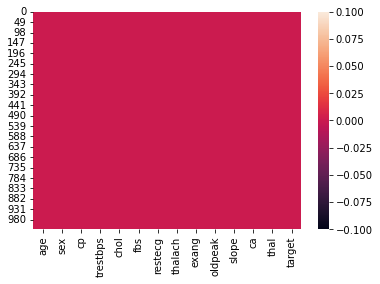

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

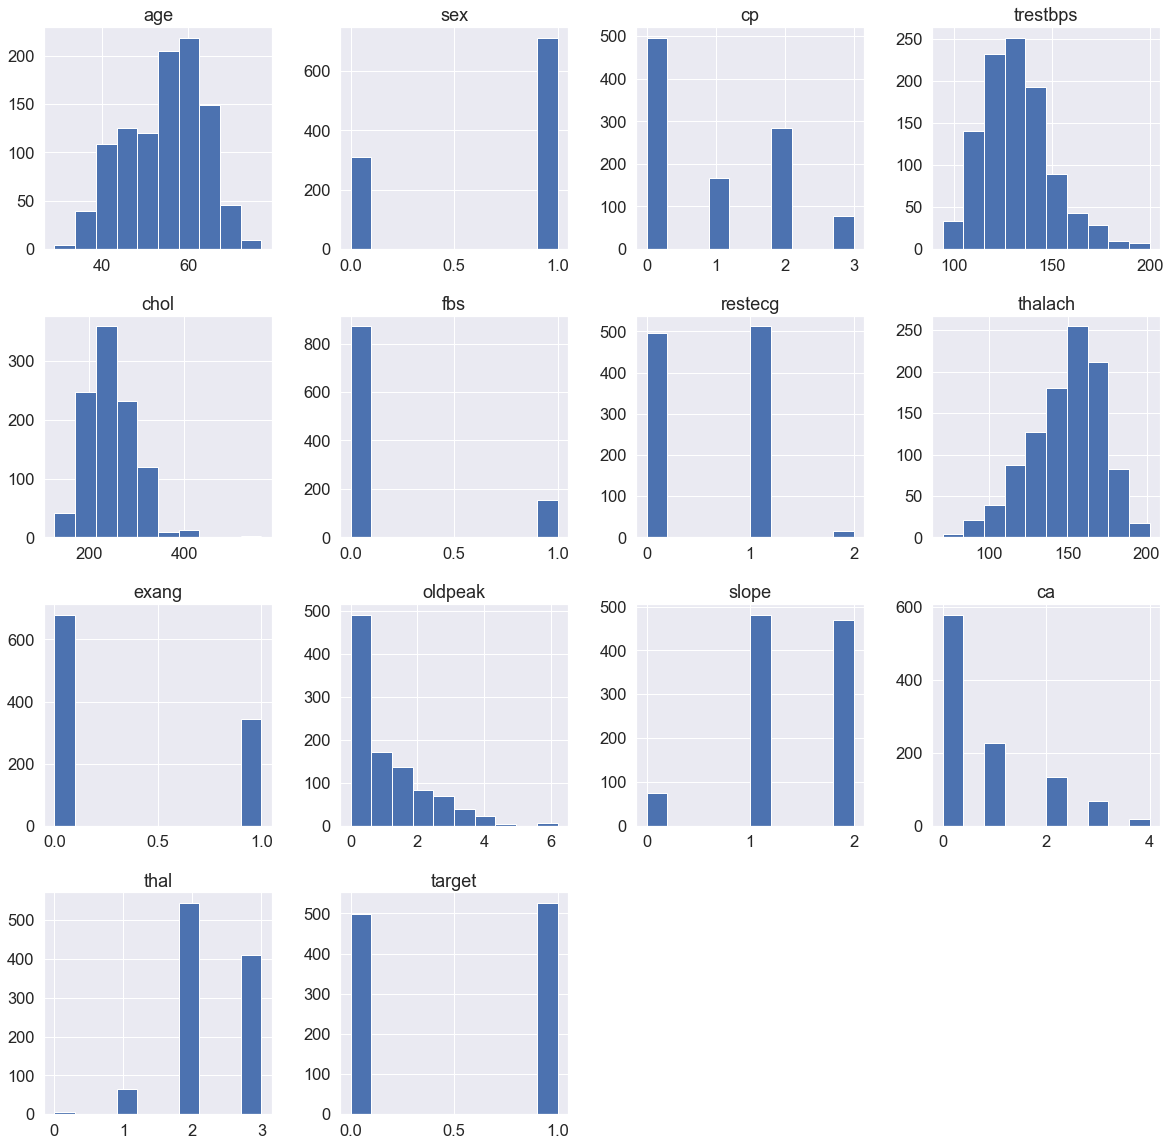

In [7]:
sns.set(font_scale = 1.5)
data.hist(figsize = (20,20))
plt.show()

In [8]:
data["age"].value_counts()

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

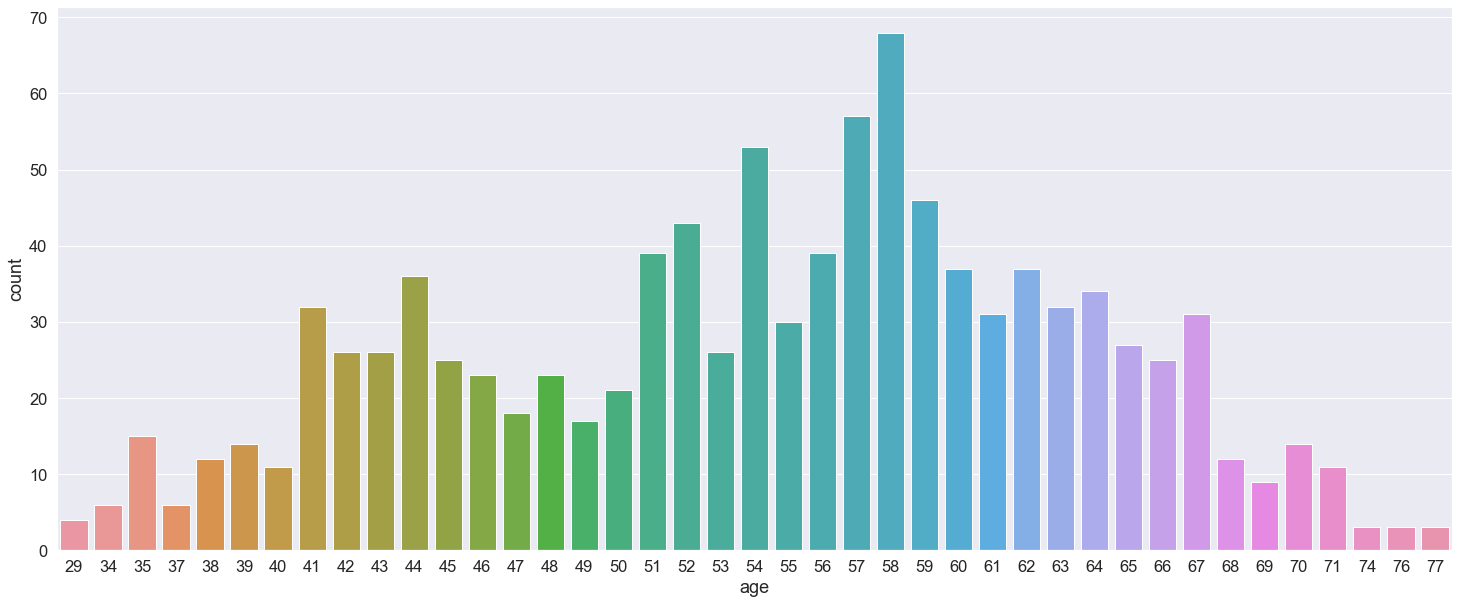

In [9]:
plt.figure(figsize = (25,10))
sns.countplot(x = "age", data = data)

In [10]:
data["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

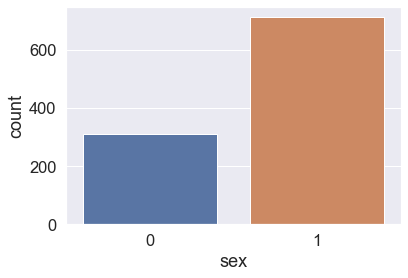

In [11]:
sns.countplot(x = "sex", data = data)

In [12]:
data["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

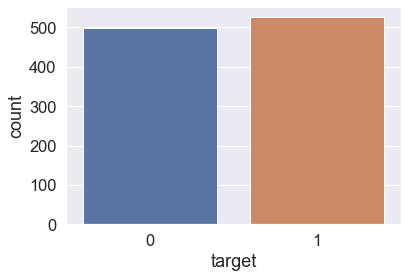

In [13]:
sns.countplot(x = "target", data = data)

In [14]:
data.groupby("age")["sex"].value_counts()

age  sex
29   1       4
34   0       3
     1       3
35   1      11
     0       4
            ..
70   1      14
71   0      11
74   0       3
76   0       3
77   1       3
Name: sex, Length: 73, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

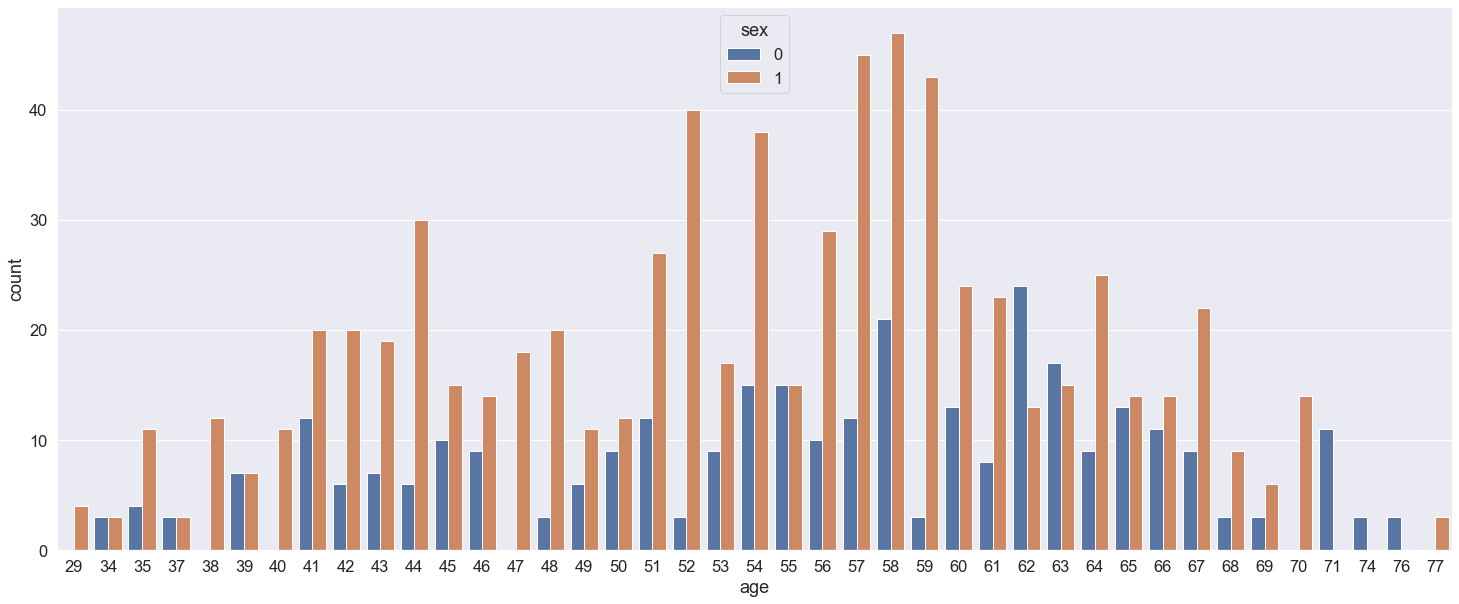

In [15]:
plt.figure(figsize = (25,10))
sns.countplot(x = "age", hue = "sex", data = data)

In [16]:
data.groupby("sex")["age"].value_counts()

sex  age
0    62     24
     58     21
     63     17
     54     15
     55     15
            ..
1    69      6
     29      4
     34      3
     37      3
     77      3
Name: age, Length: 73, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

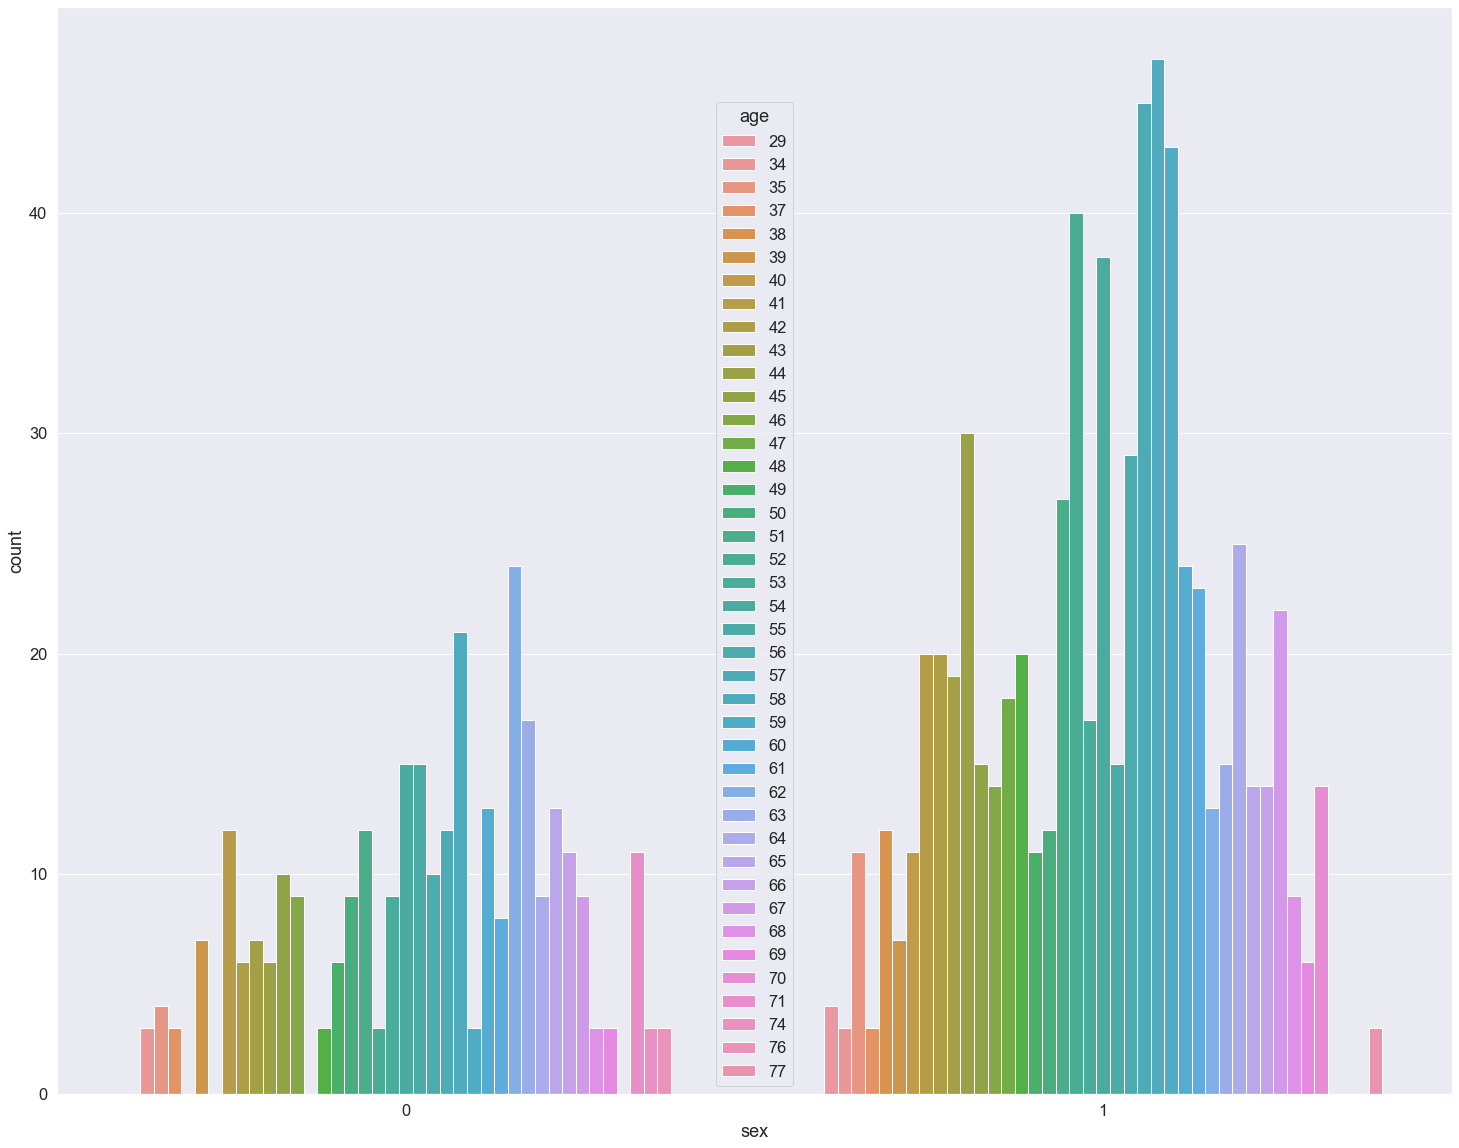

In [17]:
plt.figure(figsize = (25,20))
sns.countplot(x = "sex", hue = "age", data = data)

In [18]:
data.groupby("age")["target"].value_counts()

age  target
29   1          4
34   1          6
35   1          8
     0          7
37   1          6
               ..
70   1          3
71   1         11
74   1          3
76   1          3
77   0          3
Name: target, Length: 75, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

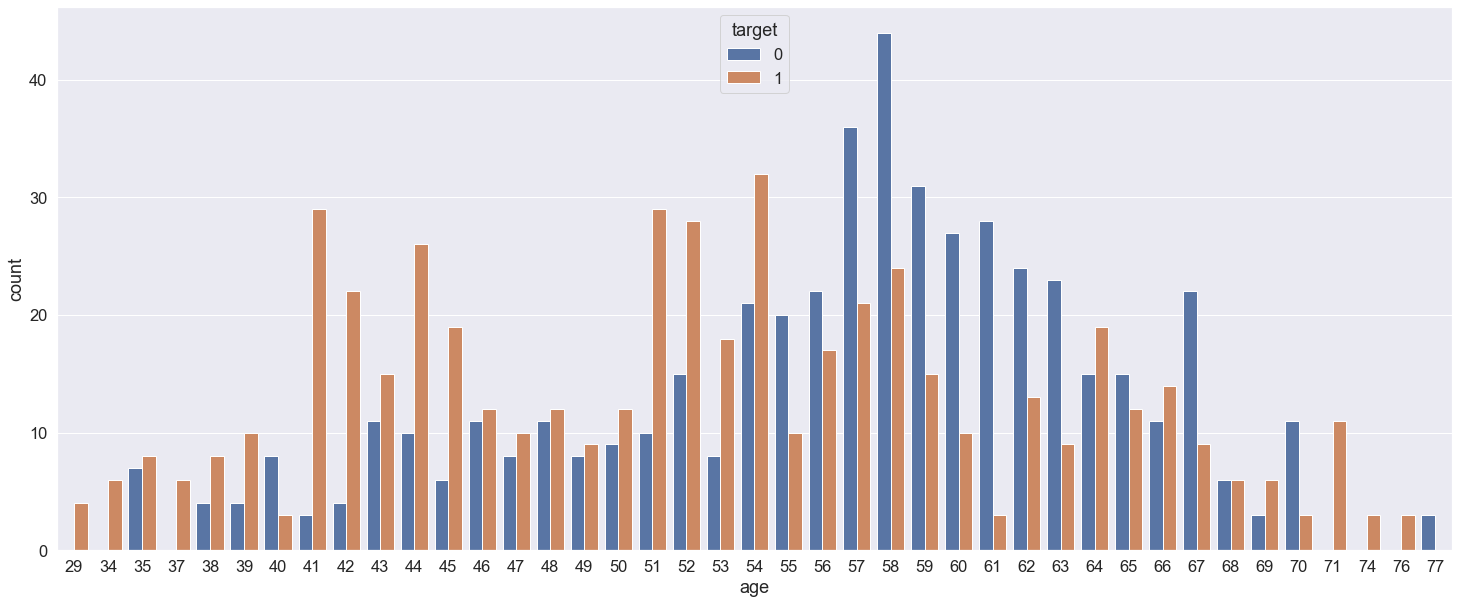

In [19]:
plt.figure(figsize = (25,10))
sns.countplot(x = "age", hue = "target", data = data)

In [20]:
data.groupby("target")["age"].value_counts()

target  age
0       58     44
        57     36
        59     31
        61     28
        60     27
               ..
1       40      3
        61      3
        70      3
        74      3
        76      3
Name: age, Length: 75, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

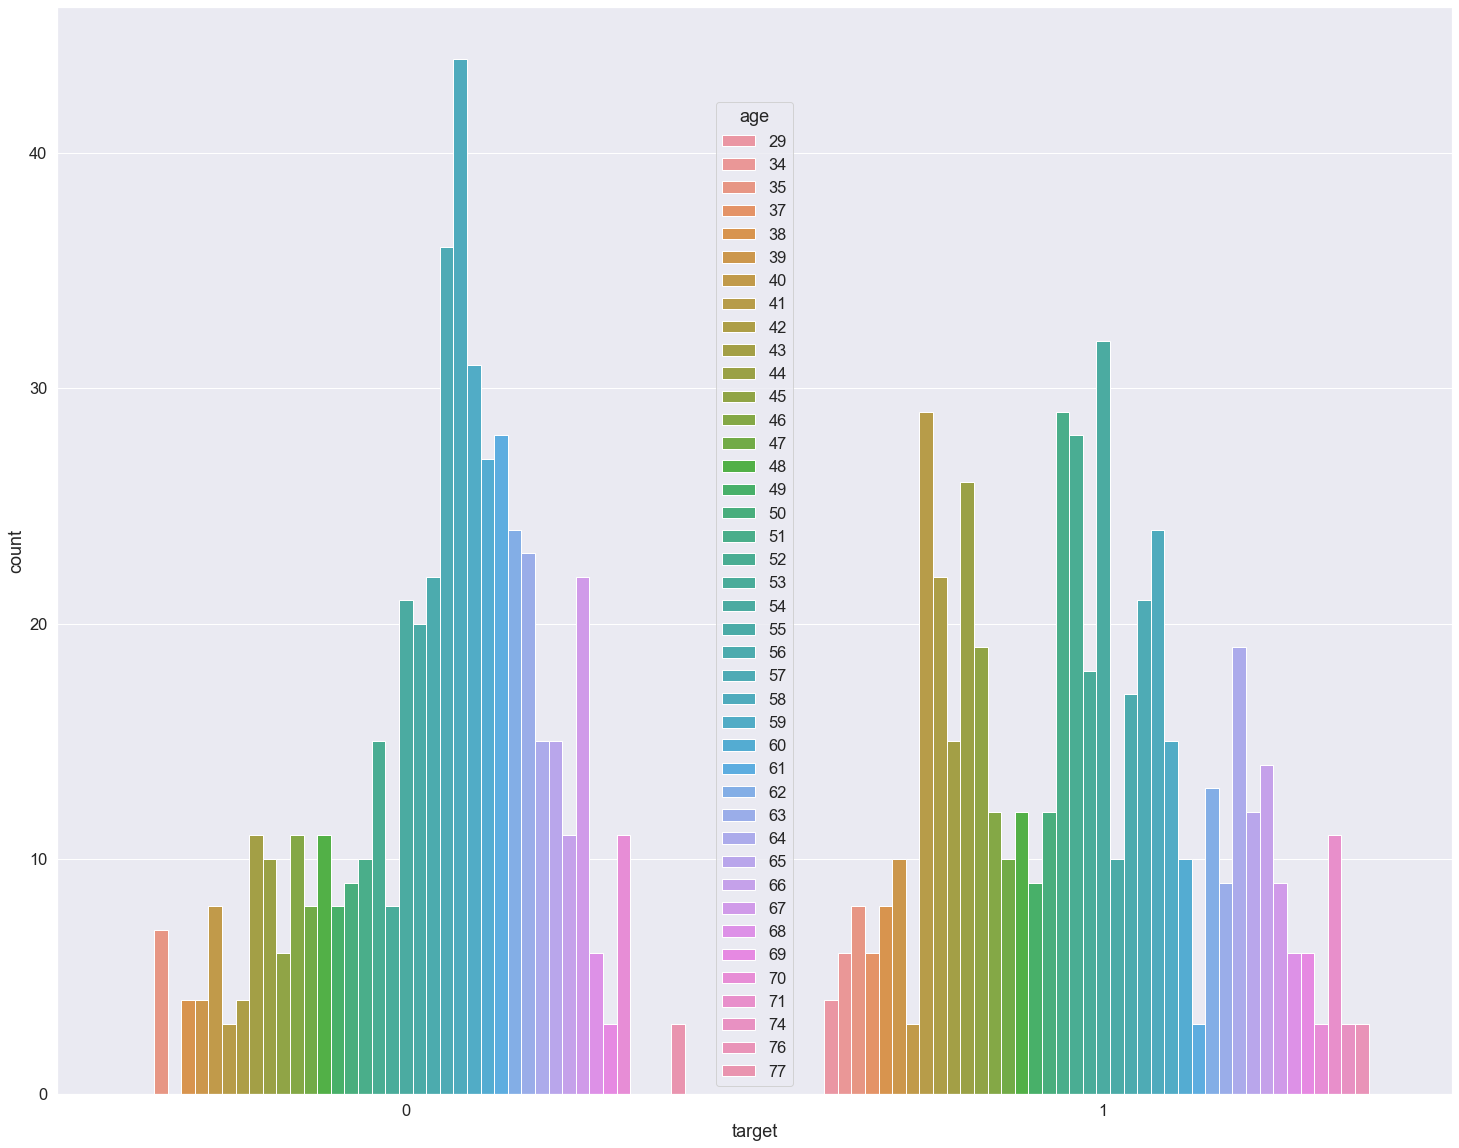

In [21]:
plt.figure(figsize = (25,20))
sns.countplot(x = "target", hue = "age", data = data)

In [22]:
data.groupby("sex")["target"].value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

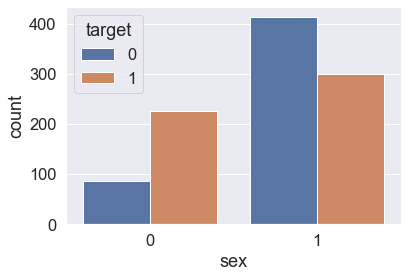

In [23]:
sns.countplot(x = "sex", hue = "target", data = data)

In [24]:
data.groupby("target")["sex"].value_counts()

target  sex
0       1      413
        0       86
1       1      300
        0      226
Name: sex, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

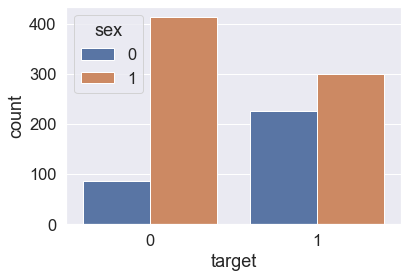

In [25]:
sns.countplot(x = "target", hue = "sex", data = data)

In [26]:
arr = list(data.columns)
arr

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

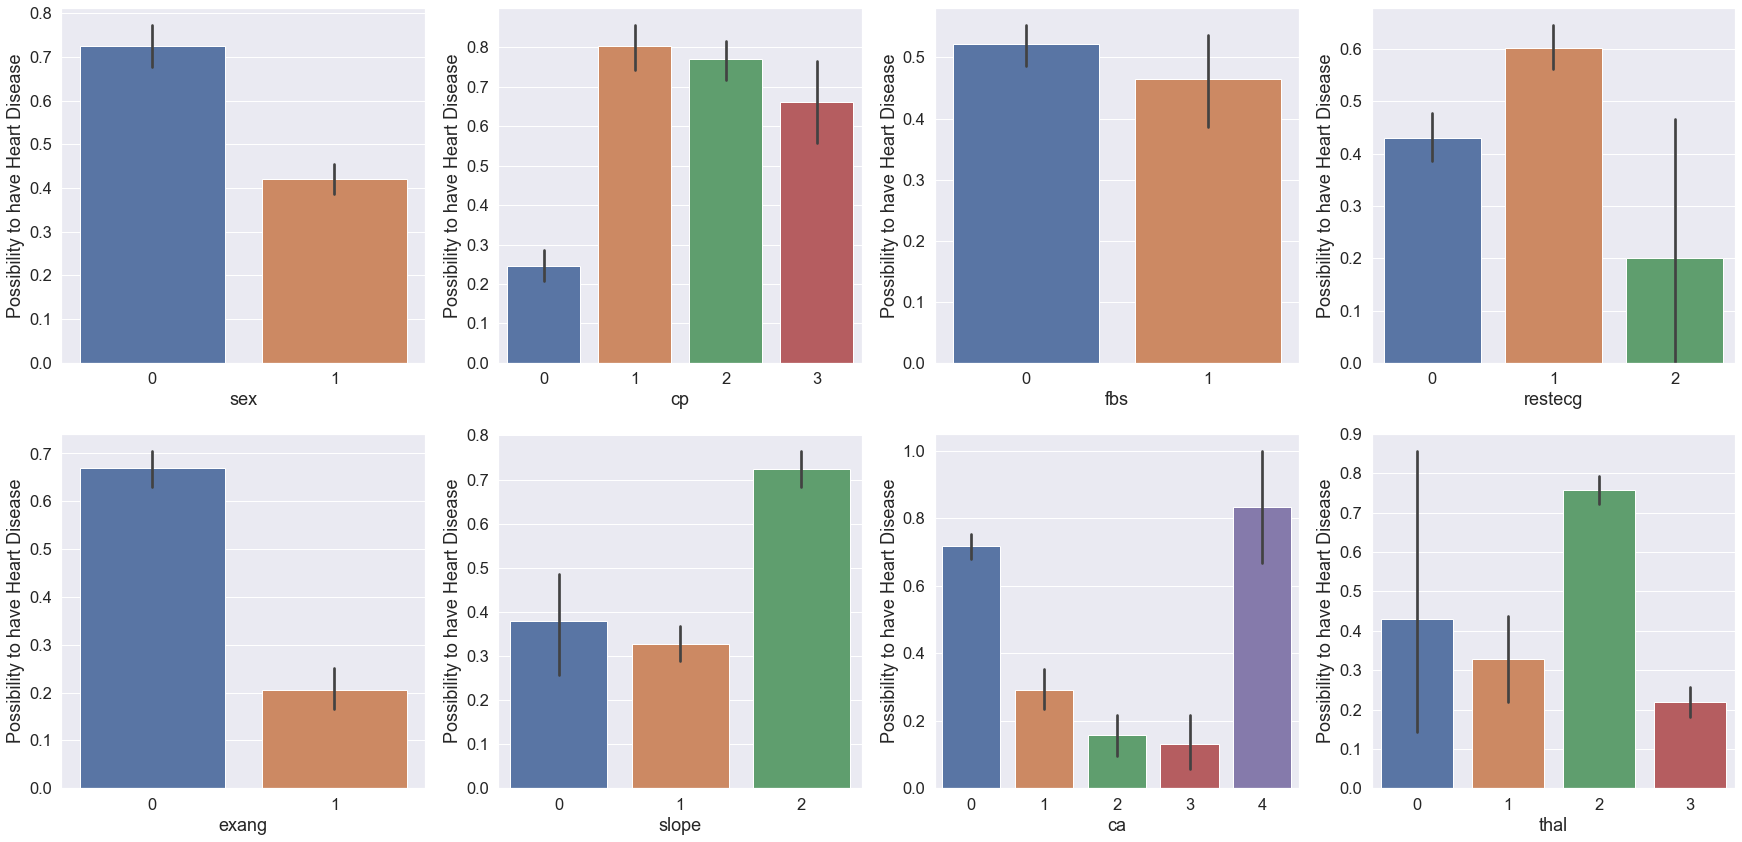

In [27]:
plt.figure(figsize = (30, 30))

arr_1 = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

for i, col in enumerate(arr_1, 1):
    plt.subplot(4, 4, i)
    sns.barplot(x = f"{col}", y = "target", data = data)
    plt.ylabel("Possibility to have Heart Disease")


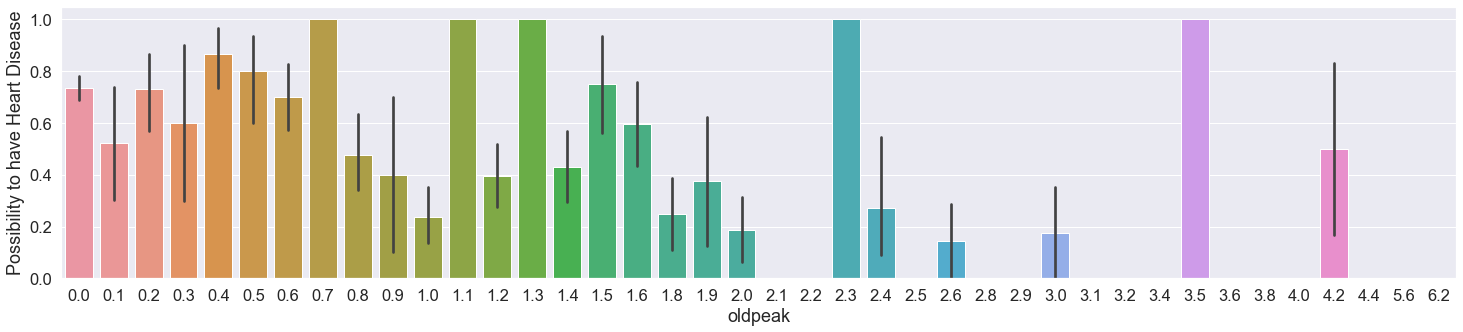

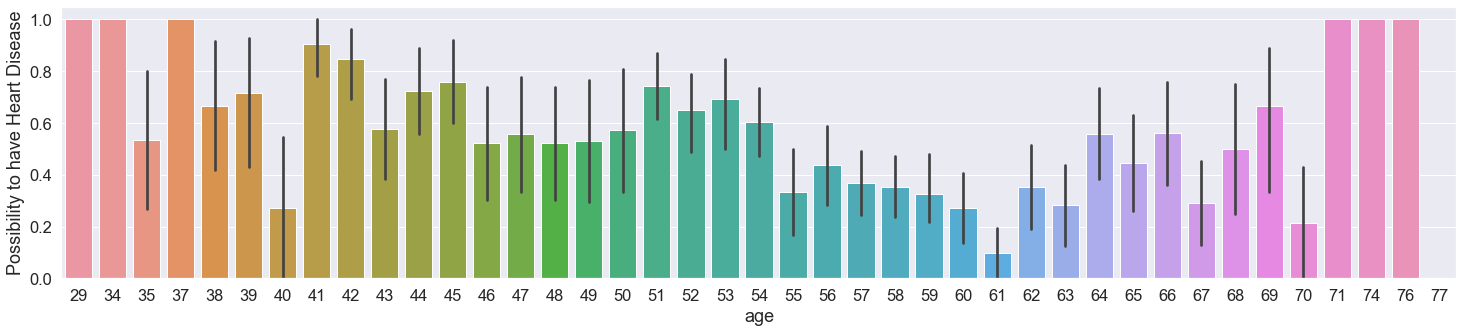

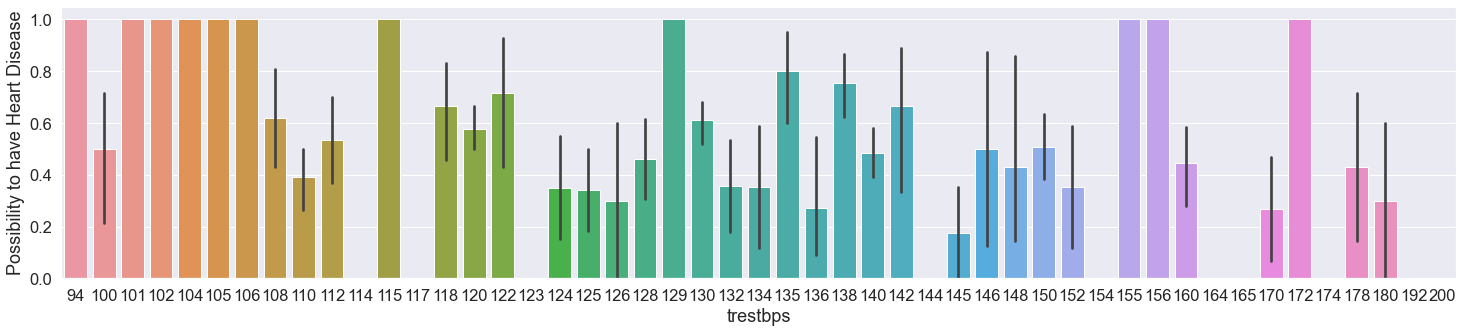

In [28]:
arr_2 = ["oldpeak", "age", "trestbps"]

for i in arr_2:
    plt.figure(figsize = (25, 5))
    sns.barplot(x = i, y = "target", data = data)
    plt.ylabel("Possibility to have Heart Disease")


In [29]:
x = data.drop("target", axis = 1)
y = data["target"]
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [31]:
print(x_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
697   67    1   2       152   212    0        0      150      0      0.8   
483   35    1   1       122   192    0        1      174      0      0.0   
123   65    0   2       140   417    1        0      157      0      0.8   
57    48    1   1       130   245    0        0      180      0      0.2   
612   58    0   0       170   225    1        0      146      1      2.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
895   62    0   2       130   263    0        1       97      0      1.2   
78    52    1   1       134   201    0        1      158      0      0.8   
879   59    1   0       138   271    0        0      182      0      0.0   
243   60    1   2       140   185    0        0      155      0      3.0   
719   52    1   0       108   233    1        1      147      0      0.1   

     slope  ca  thal  
697      1   0     3  
483      2   0     2  
123      2   1    

In [32]:
print(y_test)

697    0
483    1
123    1
57     1
612    0
      ..
895    0
78     1
879    1
243    0
719    1
Name: target, Length: 205, dtype: int64


In [33]:
RT = RandomForestClassifier()
RT.fit(x_train, y_train)
y_pred = RT.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"Random Forest Accuracy Score : {acc}")

Random Forest Accuracy Score : 100.0


<AxesSubplot:>

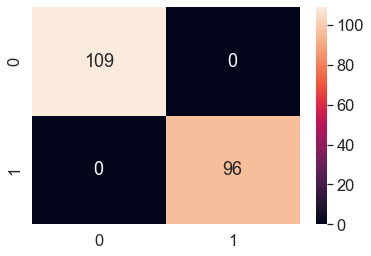

In [34]:
matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(matrix, annot = True, fmt = "g")

<AxesSubplot:>

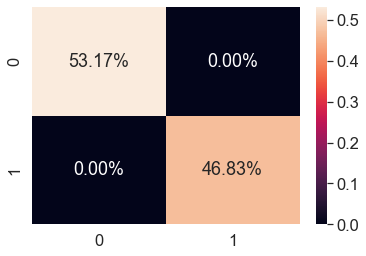

In [35]:
per = matrix/np.sum(matrix)
sns.heatmap(per, annot = True, fmt = "0.2%")